Import necessary data analysis and processing tools

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder


Loading our initial dataset into a Dataframe df

In [2]:
df = pd.read_csv('FINAL.csv', header = 0)

Inspecting the Data we collected

1) Size of our dataset
2) Displaying our column names
3) Display first few rows of our data

In [3]:
print(df.shape)
print(df.columns)
df.head(10)

(17673, 62)
Index(['user_id', 'user_win_rate', 'user_lose_rate', 'user_draw_rate',
       'user_game_count', 'user_blitz_rating', 'user_rating_bin',
       'user_white_win_rate', 'user_white_lose_rate', 'user_white_draw_rate',
       'user_white_game_count', 'user_black_win_rate', 'user_black_lose_rate',
       'user_black_draw_rate', 'user_black_game_count', 'user_top_eco',
       'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco',
       'user_mate_winrate', 'user_resign_winrate', 'user_time_winrate',
       'user_mate_lossrate', 'user_resign_lossrate', 'user_time_lossrate',
       'user_average_game_len', 'user_rating_deviation',
       'user_blitz_total_games', 'user_best_win_1', 'user_best_win_2',
       'user_best_win_3', 'op_id', 'op_win_rate', 'op_lose_rate',
       'op_draw_rate', 'op_game_count', 'op_blitz_rating', 'op_white_win_rate',
       'op_white_lose_rate', 'op_white_draw_rate', 'op_white_game_count',
       'op_black_win_rate', 'op_black_lose_rate', 

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,user_white_game_count,user_black_win_rate,user_black_lose_rate,user_black_draw_rate,user_black_game_count,user_top_eco,user_second_eco,user_top_winrate_eco,user_second_winrate_eco,user_mate_winrate,user_resign_winrate,user_time_winrate,user_mate_lossrate,user_resign_lossrate,user_time_lossrate,user_average_game_len,user_rating_deviation,user_blitz_total_games,user_best_win_1,user_best_win_2,user_best_win_3,op_id,op_win_rate,op_lose_rate,op_draw_rate,op_game_count,op_blitz_rating,op_white_win_rate,op_white_lose_rate,op_white_draw_rate,op_white_game_count,op_black_win_rate,op_black_lose_rate,op_black_draw_rate,op_black_game_count,op_top_eco,op_second_eco,op_top_winrate_eco,op_second_winrate_eco,op_mate_winrate,op_resign_winrate,op_time_winrate,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,65.0,43.333,55.000,1.667,60.0,C40,C34,B12,A45,0.386,0.439,0.158,0.545,0.167,0.258,367.0,56.63,422.0,1220.0,1205.0,1202.0,TIMFAKS,54.0,39.0,7.0,100.0,1119.0,45.161,48.387,6.452,62.0,47.619,47.619,4.762,63.0,C42,C50,D20,C55,0.379,0.414,0.172,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,64.0,45.902,54.098,0.000,61.0,C50,B28,A13,C40,0.328,0.475,0.197,0.355,0.290,0.355,388.0,45.00,2010.0,1517.0,1512.0,1500.0,Amisree,48.0,49.0,3.0,100.0,1354.0,56.452,38.710,4.839,62.0,42.857,57.143,0.000,63.0,C41,C23,C20,C01,0.161,0.516,0.242,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,60.0,44.615,46.154,9.231,65.0,D02,A40,D11,C40,0.271,0.525,0.203,0.203,0.407,0.390,379.0,49.82,1582.0,1729.0,1704.0,1687.0,Rufusikik9999,57.0,36.0,6.0,100.0,1603.0,48.438,45.312,6.250,64.0,50.820,42.623,6.557,61.0,C44,C50,B32,C72,0.355,0.435,0.210,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,64.0,45.902,45.902,8.197,61.0,B23,B00,A02,D04,0.197,0.636,0.167,0.245,0.714,0.041,277.0,46.15,7861.0,2782.0,2665.0,2664.0,NikolaDubovik,51.0,37.0,12.0,100.0,2088.0,50.820,37.705,11.475,61.0,42.188,48.438,9.375,64.0,B00,A02,A00,C31,0.345,0.310,0.293,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,56.0,44.928,44.928,10.145,69.0,B01,A40,A48,A09,0.375,0.375,0.208,0.281,0.547,0.141,329.0,52.74,671.0,1227.0,1216.0,1198.0,Bauti_Bomben,45.0,48.0,7.0,100.0,1063.0,57.143,38.095,4.762,63.0,43.548,50.000,6.452,62.0,C20,C41,C70,B50,0.349,0.302,0.333,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,62.0,53.968,42.857,3.175,63.0,D10,C02,C05,E26,0.179,0.627,0.194,0.216,0.647,0.137,448.0,46.97,799.0,2357.0,2350.0,2340.0,LomakinaGV,56.0,39.0,4.0,100.0,2125.0,60.317,36.508,3.175,63.0,48.387,43.548,8.065,62.0,A05,A04,A00,A45,0.088,0.618,0.279,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,63.0,30.645,69.355,0.000,62.0,D00,B00,D30,A03,0.053,0.211,0.605,0.329,0.447,0.082,290.0,45.05,7457.0,2362.0,2341.0,2327.0,Remigio2023,44.0,52.0,4.0,100.0,1905.0,54.098,36.066,9.836,61.0,48.438,46.875,4.688,64.0,A06,A04,C42,D02,0.266,0.328,0.391,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,61.0,51.562,48.438,0.000,64.0,B01,D00,C02,A03,0.309,0.529,0.132,0.111,0.852,0.019,449.0,45.30,1153.0,1336.0,1323.0,1320.0,ufyljybot,48.0,43.0,9.0,100.0,1366.0,40.678,49.153,10.169,59.0,48.485,43.9

Identifying missingness: If we have 0 in game_count for a user, we have missing values and should drop it

In [4]:
zero_count = (df == 0).sum()
zero_count

user_id                       0
user_win_rate               762
user_lose_rate              373
user_draw_rate             4194
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate         386
user_white_lose_rate        189
user_white_draw_rate       2945
user_white_game_count       127
user_black_win_rate         403
user_black_lose_rate        188
user_black_draw_rate       2930
user_black_game_count       131
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate           520
user_resign_winrate         513
user_time_winrate           703
user_mate_lossrate          421
user_resign_lossrate        635
user_time_lossrate         1238
user_average_game_len        58
user_rating_deviation         0
user_blitz_total_games       20
user_best_win_1             633
user_best_win_2             633
user_best_win_3             633
op_id   

We can see that there are many fields that contain 0 values. For some columns, we know that having a significant number of 0 values in their columns is a bad sign because when the lichess api breaks sometimes it imputs all 0's into the dataset. We should drop some of the rows containing the these values. For observation purposes we will draw out a few plots before cleaning the data.

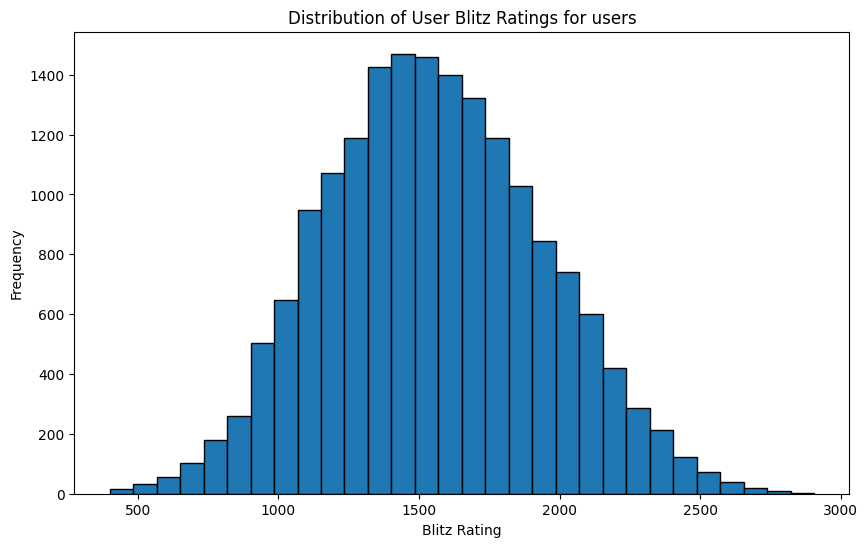

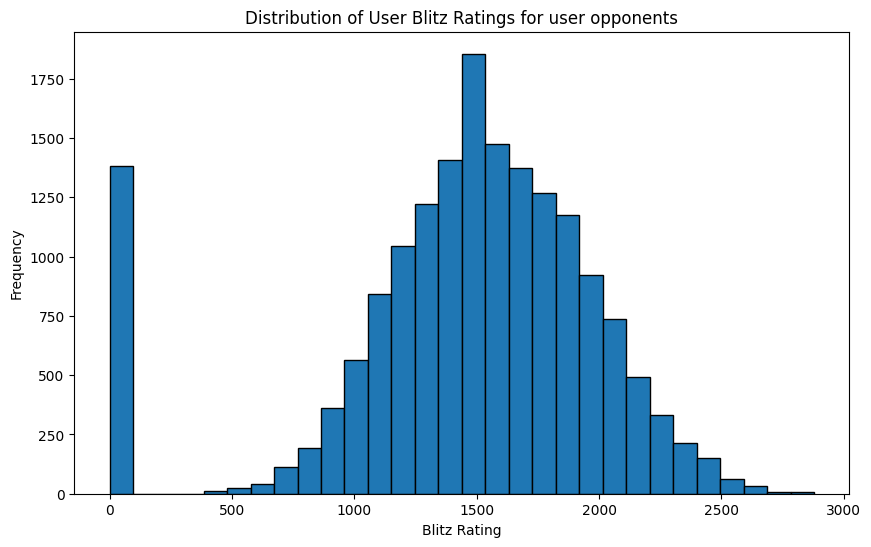

In [5]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

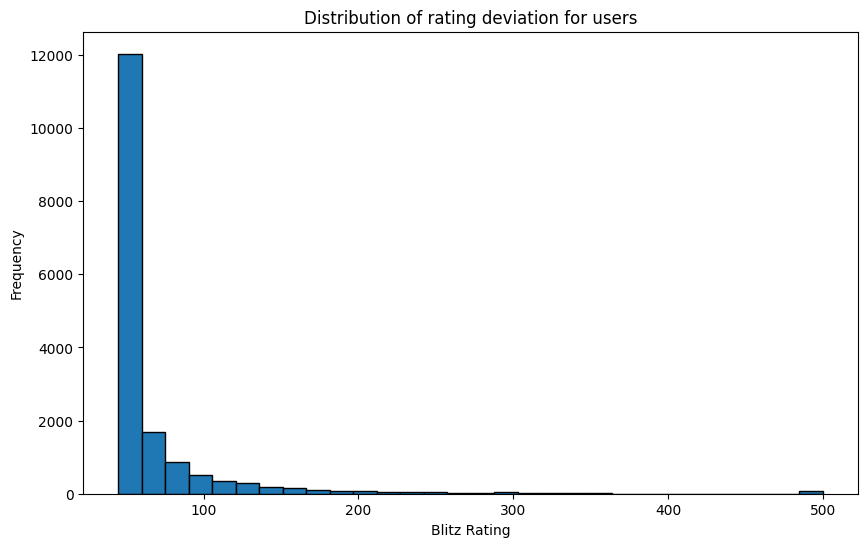

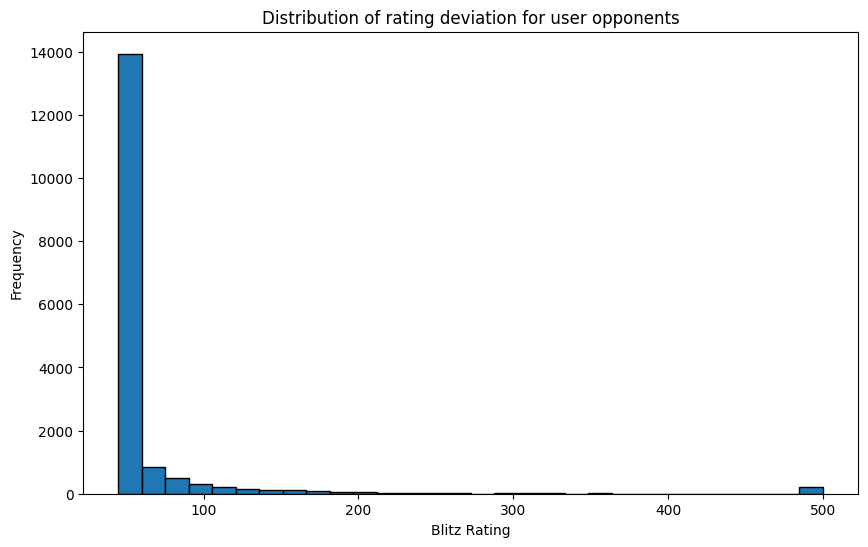

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

When the rating deviation is around 45, we know the user has a relatively stable rating, from the graph we can see that most users in our dataset has a stable rating. The only thing we have to consider is the outliers of rating deviation at 0 and at 500. These data points will be dropped.

Now for some actual data cleaning.

1) Remove null values.
2) Remove all games, and sub-categories of the games that have counts of 0.
If the total number of games played by a user is less than 10, they aren't active enough in the game time control style. Thus they will be removed too.
Rating deviation outliers will be removed.

In [7]:
df = df.dropna()
game_counts = [
    'user_game_count',
    'op_game_count',
    'user_blitz_total_games',
    'op_blitz_total_games'
]
for column in game_counts:
    df = df[df[column] >= 10]
    
game_0s = [
    'user_win_rate',
    'user_lose_rate',
    'user_mate_winrate',
    'user_mate_lossrate',
    'op_win_rate',
    'op_lose_rate',
    'op_mate_winrate',
    'op_mate_lossrate',
    'op_blitz_rating'
    
]
for column in game_0s:
    df = df[df[column] != 0]
    
    
df = df[(df['user_rating_deviation'] != 0) & (df['user_rating_deviation'] != 500) &
        (df['op_rating_deviation'] != 0) & (df['op_rating_deviation'] != 500)]

# Filter the DataFrame to keep rows where both ratings are between 500 and 2900
df = df[(df['user_blitz_rating'] >= 500) & (df['user_blitz_rating'] <= 2900) &
        (df['op_blitz_rating'] >= 500) & (df['op_blitz_rating'] <= 2900)]


In [8]:
print(df.shape)
zero_count = (df == 0).sum()
print(zero_count)

(13418, 62)
user_id                       0
user_win_rate                 0
user_lose_rate                0
user_draw_rate             1957
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate           7
user_white_lose_rate          1
user_white_draw_rate       1737
user_white_game_count         0
user_black_win_rate           9
user_black_lose_rate          1
user_black_draw_rate       1676
user_black_game_count         0
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate             0
user_resign_winrate          40
user_time_winrate            84
user_mate_lossrate            0
user_resign_lossrate        243
user_time_lossrate          588
user_average_game_len         0
user_rating_deviation         0
user_blitz_total_games        0
user_best_win_1              72
user_best_win_2              72
user_best_win_3             

Draw rate of 0, game result being o and many of these remaining values being 0 is reasonable and does not cause noise in our data so we won't be removing them.

Lets visualized this processed data now.

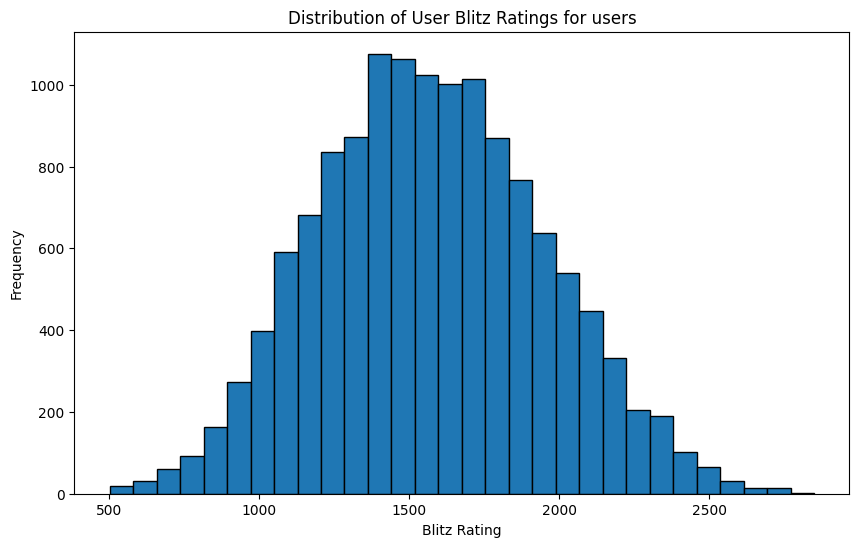

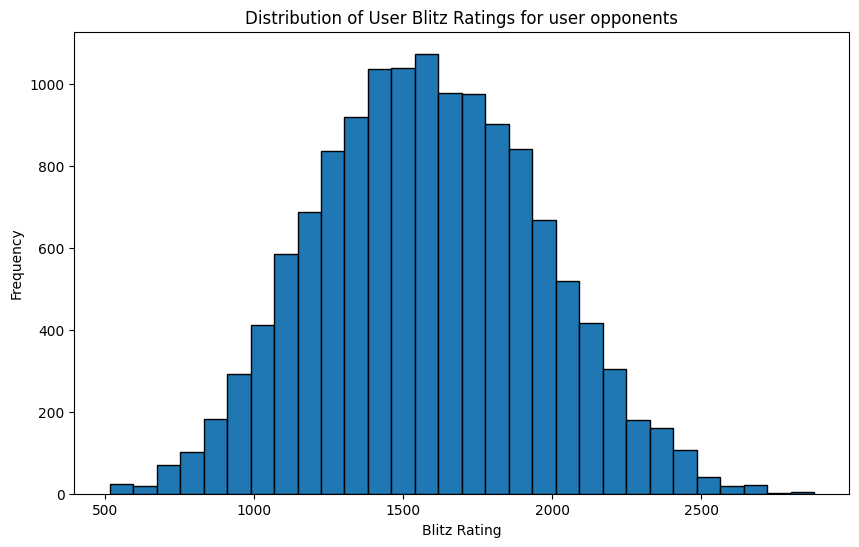

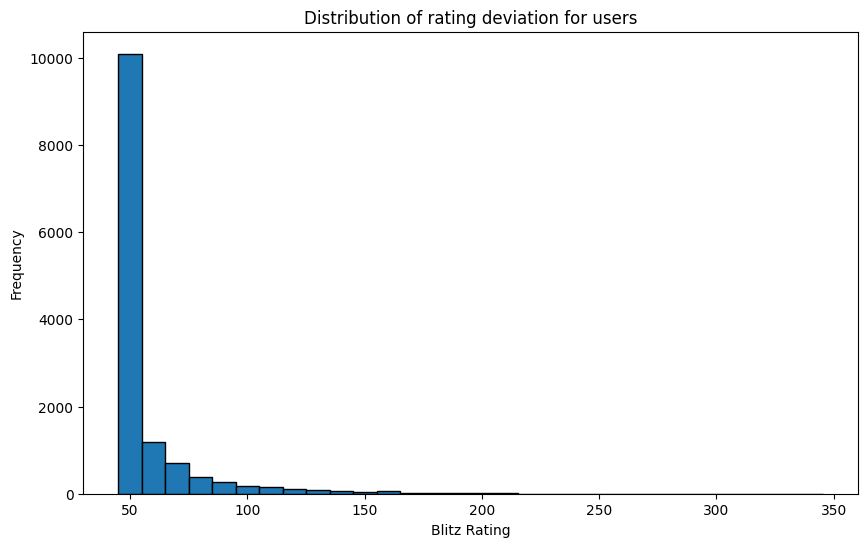

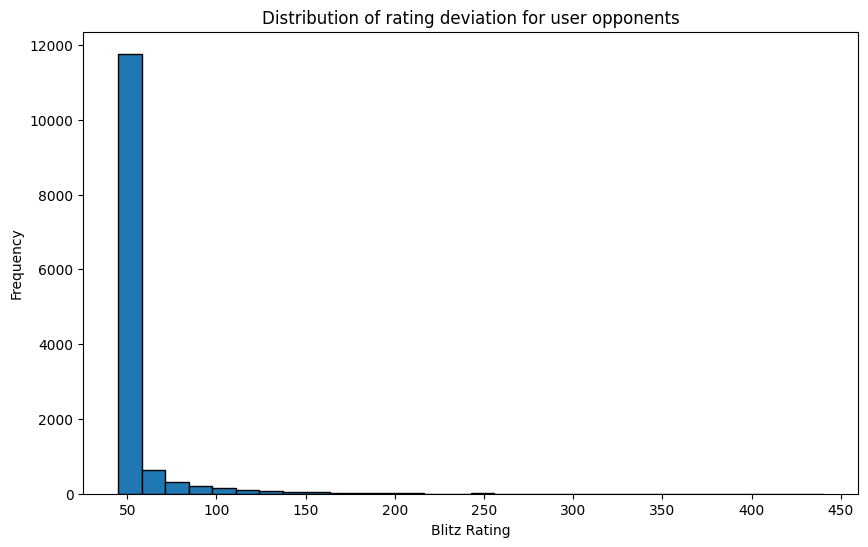

In [9]:

# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

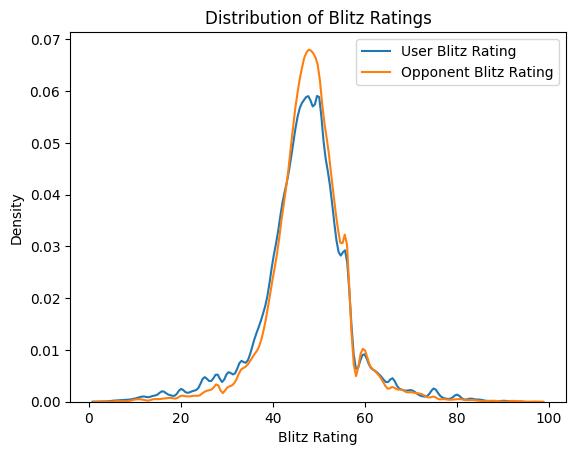

In [10]:

sns.kdeplot(df['user_win_rate'], label='User Blitz Rating', bw_adjust=0.5)
sns.kdeplot(df['op_win_rate'], label='Opponent Blitz Rating', bw_adjust=0.5)

# Add more columns as needed
# sns.kdeplot(df['another_column'], label='Another Rating', bw_adjust=0.5)

# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

This indicates that indeed for the most part, players are matched against players in their own rating bracket so our data collection was effective.

Interestingly enough, our user's seemed to be matched up againsgt higher rated opponents!

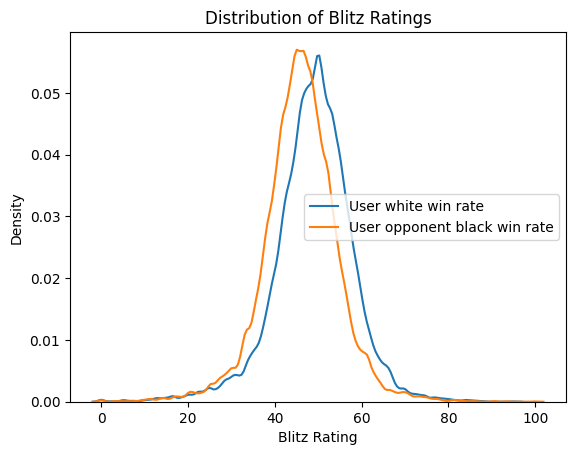

In [11]:
sns.kdeplot(df['user_white_win_rate'], label='User white win rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_win_rate'], label='User opponent black win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

We can probably generalize that players playinng white has a higher win rate than those playing black.